## Problem Set 1

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

#### Problem A1

In [20]:
a = [1, np.pi, 0.37, np.exp(6)]
print(a)

[1, 3.141592653589793, 0.37, np.float64(403.4287934927351)]


#### Problem A2

In [21]:
print(type(a))

<class 'list'>


#### Problem A3

In [22]:
b = [2 + num for num in a]
print(b)

[3, 5.141592653589793, 2.37, np.float64(405.4287934927351)]


#### Problem A4

In [23]:
c = [num/2 for num in b]
print(c)

[1.5, 2.5707963267948966, 1.185, np.float64(202.71439674636756)]


#### Problem A5

In [24]:
step = 1
one_thirtyseven_one = np.arange(1, 37 + step, step)
one_thirtyseven_one

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37])

#### Problem A6

In [25]:
step = 0.1
d = np.arange(0, 6 + step, step)
d

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. ])

#### Problem A7

In [26]:
print(len(d))

61


#### Problem A8

In [27]:
# list to store primes
myprimes = [2]
num_primes = 20   # number of primes to calculate

prime_candidate = myprimes[-1] + 1
while ( len(myprimes) < num_primes ):

  # start from the largest prime number
  prime_candidate = max(myprimes[-1] + 1, prime_candidate)

  isPrime = True
  for num in myprimes:
    if prime_candidate % num == 0:
      isPrime = False

  if isPrime: myprimes.append( prime_candidate )
  else: prime_candidate += 1
  
myprimes

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71]

#### Problem A9

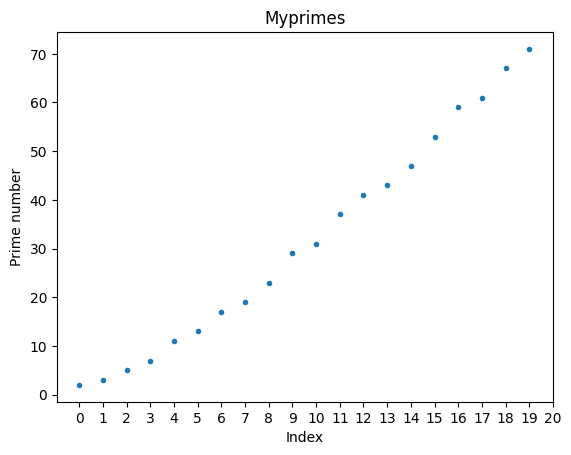

In [28]:
plt.figure()

plt.plot(myprimes, linestyle = '', marker = '.')

plt.xlabel('Index')
plt.xticks(np.arange(0, len(myprimes)+1))

plt.ylabel('Prime number')

plt.title('Myprimes')
plt.show()

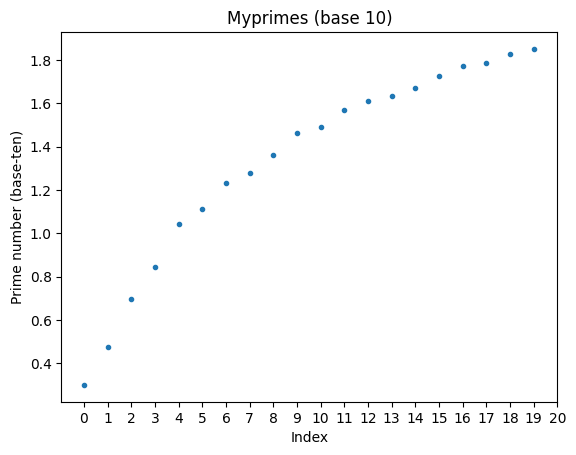

In [29]:
plt.figure()

plt.plot([np.log10(num) for num in myprimes], linestyle = '', marker = '.')

plt.xlabel('Index')
plt.xticks(np.arange(0, len(myprimes)+1))

plt.ylabel('Prime number (base-ten)')

plt.title('Myprimes (base 10)')
plt.show()

#### Problem A10/A11/A12

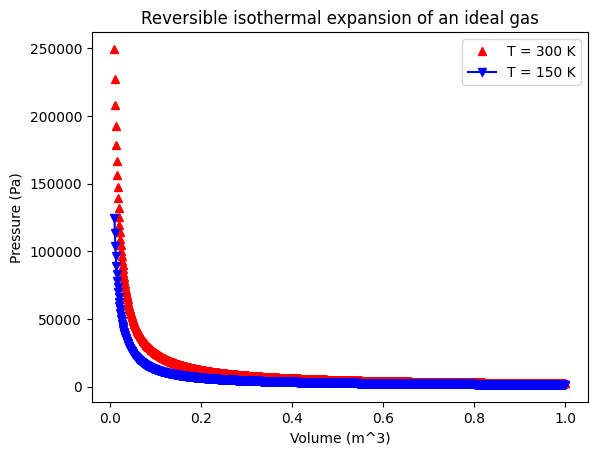

In [30]:
p = lambda n, R, T, V: n * R * T / V

n = 1.0   # mole
R = 8.314 # m^3 * Pa * mol^-1 * K^-1
T = 300   # kelvin
T2 = 150  # kelvin
V = np.linspace(0.01, 1, num = int(1e3))  # m^3
p_vals = np.array(p(n, R, T, V))
p_vals2 = np.array(p(n, R, T2, V))

plt.figure()
plt.plot(V, p_vals, linestyle = '', marker = '^', color = 'r', label = 'T = 300 K')
plt.plot(V, p_vals2, linestyle = '-', marker = 'v', color = 'b', label = 'T = 150 K')
plt.xlabel('Volume (m^3)')
plt.ylabel('Pressure (Pa)')
plt.title('Reversible isothermal expansion of an ideal gas')

plt.legend()
plt.show()

#### Problem B5

In [31]:
def coin_toss_simulator(N_tot, repeats):
  # simulate N_tot coint tosses - repeat it repeats times
  # 1 = heads, 0 = tails
  sim = np.random.randint(0, 2, size = (N_tot, repeats))

  heads = np.sum(sim, axis=0)

  stdev = np.std(heads)
  sharpness = stdev/N_tot

  return heads, stdev, sharpness

# 10 tosses, 100 repeats
heads10_100, stdev10_100, sharpness10_100 = coin_toss_simulator(10, 100)

# 1,000 tosses, 10,000 repeats
heads1k_10k, stdev1k_10k, sharpness1k_10k = coin_toss_simulator(1_000, 10_000)

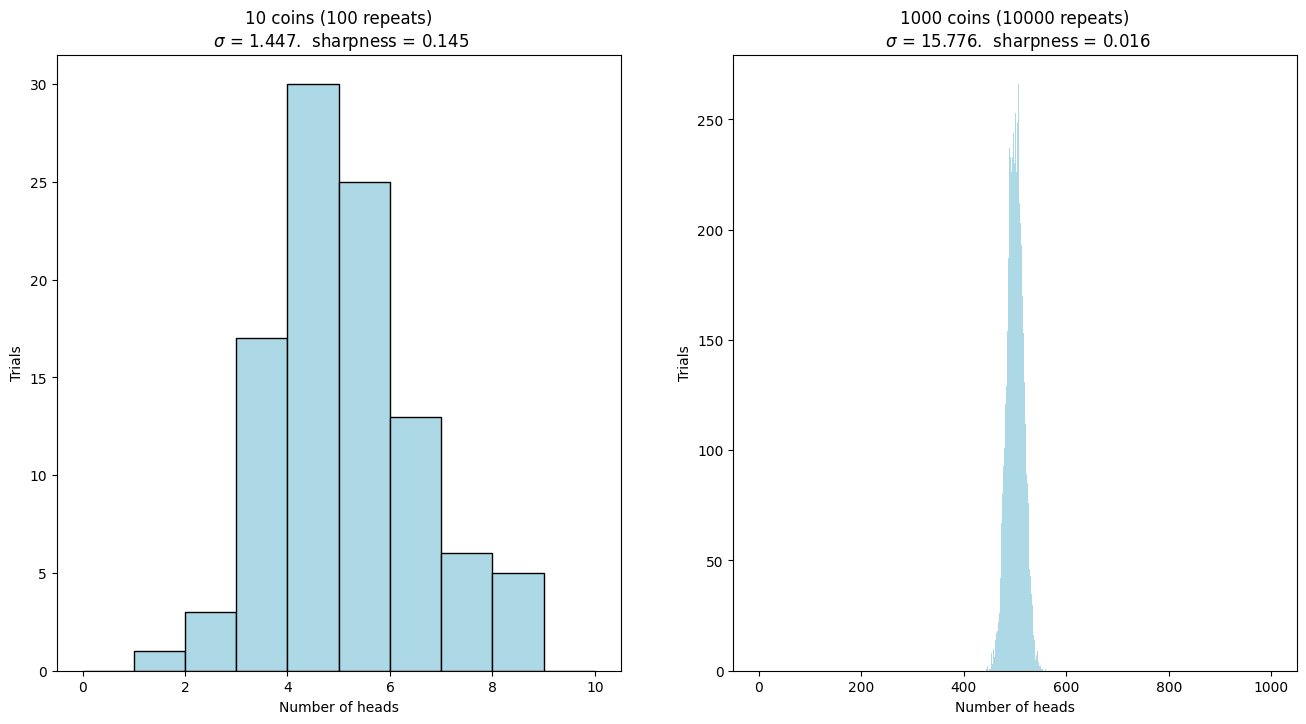

In [38]:
fig, (plot1, plot2) = plt.subplots(1, 2, figsize = (16, 8))

# 10 tosses, 100 repeats
plot1.hist(heads10_100, bins = np.arange(0, 11), color = 'lightblue', edgecolor='black')
plot1.set_xlabel('Number of heads')
plot1.set_ylabel('Trials')
plot1.set_title(f'10 coins (100 repeats)\n $σ$ = {stdev10_100:.3f}.  sharpness = {sharpness10_100:.3f}')

# 1,000 tosses, 10,000 repeats
plot2.hist(heads1k_10k, bins = np.arange(0, 1001), color = 'lightblue')
plot2.set_xlabel('Number of heads')
plot2.set_ylabel('Trials')
plot2.set_title(f'1000 coins (10000 repeats)\n $σ$ = {stdev1k_10k:.3f}.  sharpness = {sharpness1k_10k:.3f}')

plt.show()

#### Problem B6

In [50]:
from math import comb

In [51]:
def scaled_binomial_dist(tosses, trials):
  p_H = 0.5
  N_tot = tosses
  repeats = trials

  k = np.arange(0, N_tot + 1)

  # binomial coefficients
  n_choose_k = np.array([comb(N_tot, ki) for ki in k])

  # Generate distribution
  binom_dist = n_choose_k * p_H**k * (1-p_H)**(N_tot - k)

  # scale by repeats
  expected_freq = binom_dist * repeats

  # deviation
  stdev = np.sqrt(N_tot * (p_H) * (1- p_H))
  sharpness = stdev / N_tot

  return expected_freq, stdev, sharpness

expected10_100, expected_stdev10_100, expected_sharpness10_100 = scaled_binomial_dist(10, 100)
expected1k_10k, expected_stdev1k_10k, expected_sharpness1k_10k= scaled_binomial_dist(1_000, 10_000)

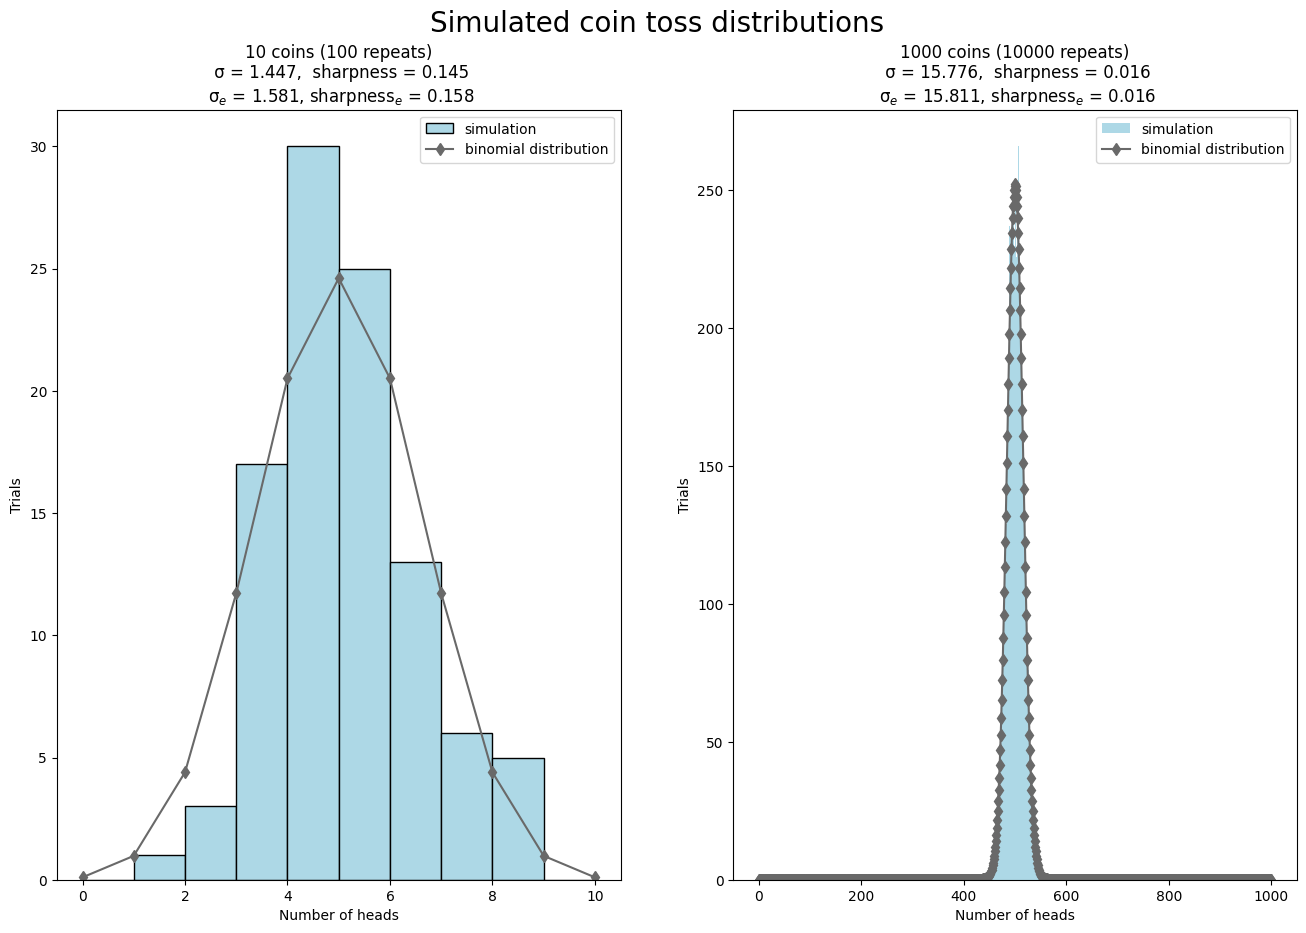

In [52]:
fig, (plot1, plot2) = plt.subplots(1, 2, figsize = (16, 10))

# 10 tosses, 100 trials
plot1.hist(heads10_100, bins = np.arange(0, 11), color = 'lightblue', edgecolor='black', label = 'simulation')
plot1.plot(expected10_100, color = 'dimgrey', marker = 'd', label = 'binomial distribution')

plot1.set_title(
  f'10 coins (100 repeats)'
  f'\n σ = {stdev10_100:.3f},  sharpness = {sharpness10_100:.3f}'
  f'\n σ$_e$ = {expected_stdev10_100:.3f}, sharpness$_e$ = {expected_sharpness10_100:.3f}'
  )
plot1.set_xlabel('Number of heads')
plot1.set_ylabel('Trials')
plot1.legend()

# 1,000 tosses, 10,000 trials
plot2.hist(heads1k_10k, bins = np.arange(0, 1001), color = 'lightblue', label = 'simulation')
plot2.plot(expected1k_10k, color = 'dimgrey', marker = 'd', label = 'binomial distribution')

plot2.set_title(
  f'1000 coins (10000 repeats)'
  f'\n σ = {stdev1k_10k:.3f},  sharpness = {sharpness1k_10k:.3f}'
  f'\n σ$_e$ = {expected_stdev1k_10k:.3f}, sharpness$_e$ = {expected_sharpness1k_10k:.3f}'
  )
plot2.set_xlabel('Number of heads')
plot2.set_ylabel('Trials')
plot2.legend()

fig.suptitle('Simulated coin toss distributions', fontsize = 20)

plt.show()

#### Problem B7

In [53]:
n = 200                       # people on plane
p_know = 2000 / 300_000_000   # probability of knowing a random individual in my country

p_know_nobody = lambda p_k, n: 1 - (1 - p_k)**n
print(f'{p_know_nobody(p_know, n) = :.3e}')

p_know_nobody(p_know, n) = 1.332e-03
